# Statistical Data Analysis of CAPSTONE PROJECT I 

## Predicting Pain Relievers Based on Age and Satisfaction Level

## 3. Statistical Analysis

### 3.1 Correlation between features

#### EaseofUse vs Effectiveness vs Satisfaction
we compare the means of EaseofUse, Effectivness and Satisfaction. The mean value of EaseofUse and Satisfaction for the first three age group showed strong association compared to the mean of Effectiveness and Satisfaction mean which showed weak association. For the remaining age group,  the mean of Effectiveness and Satisfaction mean showed very strong association relative to the mean of EaseofUse and Satisfaction mean. 

In [31]:
# Nominal feature encoding for calculation purpose
# Define manual map for Age
Age_map={'0-2':1,'3-6':5,'7-12':10,'13-18':15,'19-24':20,'25-34':30,'35-44':40,'45-54':50,'55-64':60,'65-74':70,'75 or over':80}
df['Age_map']=df['Age'].map(Age_map)    


In [33]:
df_mean=df.groupby('Age_map').mean()
df_mean

,EaseofUse,Effectiveness,Satisfaction
Age_map,,,
5,1.750000,1.750000,1.500000
10,4.500000,4.000000,5.000000
15,4.106383,3.680851,3.468085
20,4.191617,3.592814,3.365269
30,3.996587,3.234642,2.942833
40,4.046296,3.401559,3.123782
50,4.049808,3.330386,3.101385
60,4.114654,3.409018,3.185829
70,4.121482,3.412491,3.258751


<Figure size 480x400 with 0 Axes>

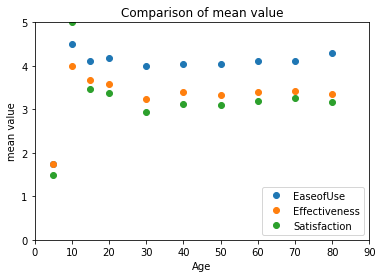

In [34]:
plt.figure(figsize=(6,5), dpi= 80)
df_mean.plot(style='o')
# Plot formatting
plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,5)
plt.title('Comparison of mean value')
plt.legend(loc='lower right')

Let's estimate the mean difference beween effectiveness and satisfaction means of population using bootstraping.

In [47]:
#function for bootstrap sampling
def bootstrap_replicate (data,func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
    
#function for bootstarap replicates
def draw_bs_reps(data, func, size=10000):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data,func)
    return bs_replicates

In [52]:
# Making aliases
effectiveness = np.array(df['Effectiveness'])
satisfaction = np.array(df['Satisfaction'])

# Computing confidence intervals
# Compute the observed difference of the sample means: mean_diff
mean_diff = np.mean(effectiveness) - np.mean(satisfaction)

# Get bootstrap replicates of means
bs_replicates_effectiveness = draw_bs_reps(effectiveness, np.mean, size=100000)
bs_replicates_satisfaction = draw_bs_reps(satisfaction, np.mean, size=100000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_effectiveness - bs_replicates_satisfaction

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff)
print('95% confidence interval =', conf_int)

difference of means = 0.23066666666666658
95% confidence interval = [0.19316667 0.26758542]


The difference of means is 0.231, and our 95% confidence interval is 0.1932 and 0.2676. Since we get a range of values for the specified confidence interval, there is a specified probability that the value of a parameter lies within this range. 

#### Correlation using heatmap

A good way to quickly check correlations among features is by visualizing the correlation matrix as a heatmap using heatmap function of seaborn. 

We can note that the effectiveness and satisfaction showed very strong positive correlation with correlation value of 0.83 compared to EaseofUse and Satisfaction of correlation 0.54. 

In [45]:
df_cov=df.cov()
df_cov

,EaseofUse,Effectiveness,Satisfaction,Age_map
EaseofUse,1.522775,0.907094,1.038513,0.613642
Effectiveness,0.907094,1.981636,1.808782,0.202298
Satisfaction,1.038513,1.808782,2.401451,0.639402
Age_map,0.613642,0.202298,0.639402,192.475739


In [40]:
#df=df.drop('Age_map', axis=1)
df_cor=df.corr()
df_cor

,EaseofUse,Effectiveness,Satisfaction,Age_map
EaseofUse,1.000000,0.522183,0.543072,0.035843
Effectiveness,0.522183,1.000000,0.829158,0.010358
Satisfaction,0.543072,0.829158,1.000000,0.029741
Age_map,0.035843,0.010358,0.029741,1.000000


In [46]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.1


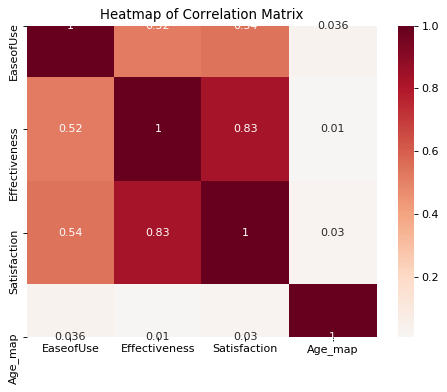

In [41]:
#graphical representation of corellation
plt.figure(figsize=(6,5), dpi= 80)
hm=sns.heatmap(df_cor, annot=True,center = 0,cmap='RdBu_r', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()


### 3.2 Hypotheisis formulation

From the correlation analysis we noted that the correlation between effectiveness and satisfaction very strong positive correlation with correlation value of 0.83. Hence, it is fair to ask that does Effectivness has an impact on Satisfaction or are both correlated? 

#### Impact of Effectiveness and Satisfaction

Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables.

Hypothesis Testing:  Is there significant difference between the patients response towards Effectiveness and Satisfaction?


##### Null  Hypothesis: 
\begin{array}{c}
H_0: \rho_{Effectiveness} = \rho_{Satisfaction}
\end{array}

The null hypothesis would be that there is no difference in patients response of Effectiveness and Satisfaction:

##### Alternate Hypothesis:  
\begin{array}{c}
H_A: \rho_{Effectiveness} \neq \rho_{Satisfaction}
\end{array}


The alternative hypothesis would be that there is a difference in patients response of Effectiveness and Satisfaction.

In oder to test this hypothesis, we conducted t-test using ttest_ind()

In [63]:
from scipy.stats import ttest_ind
from scipy import stats
ttest,pval = stats.ttest_ind(df['Effectiveness'], df['Satisfaction'])
print('stat=%.3f, p=%.3f' % (ttest,pval))
if pval < 0.05:
    print("fail to accept the null hypothesis")
else:
    print("accept null hypothesis")

stat=378.746, p=0.000
fail to accept the null hypothesis


The p-value = 0 means that we could not see a single value that is similar or higher than the observed correlation, which goes against our Null Hypothesis (Ho).

#### Impact of Age and Satisfaction


Hypothesis Testing:  Is there significant difference between the Satisfaction level the patients based on the age?


##### Null  Hypothesis: 
\begin{array}{c}
H_0: \rho_{Age} = \rho_{Satisfaction}
\end{array}

The null hypothesis would be that there is no difference in Satisfaction level the patients based on the age:

##### Alternate Hypothesis:  
\begin{array}{c}
H_A: \rho_{Age} \neq \rho_{Satisfaction}
\end{array}


The alternative hypothesis would be that there is a difference in Satisfaction level the patients based on the age.


In [67]:
ttest,pval = stats.ttest_ind(df['Age_map'], df['Satisfaction'])
print('stat=%.3f, p=%.3f' % (ttest,pval))
if pval < 0.05:
    print("fail to accept the null hypothesis")
else:
    print("accept null hypothesis")

stat=378.746, p=0.000
fail to accept the null hypothesis


The p-value = 0 means that we could not see a single value that is similar or higher than the observed correlation, which goes against our Null Hypothesis (Ho).